In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-additional.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

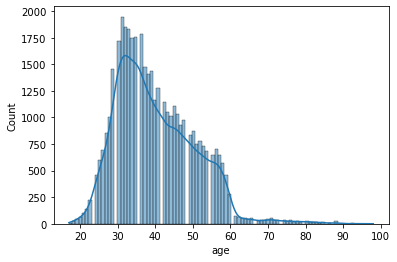

In [6]:
sns.histplot(x = 'age', data = df, kde = True)

<AxesSubplot:xlabel='y', ylabel='age'>

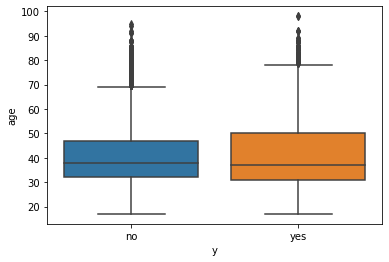

In [7]:
#Bad predictor because there is no distinction between the two
sns.boxplot(x = 'y', y = 'age', data = df)

In [8]:
df.drop('age', axis = 1, inplace = True)

In [9]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
#Bad predictor
pd.crosstab(df['job'], df['y'], margins = True)

y,no,yes,All
job,,,
admin.,9070,1352,10422
blue-collar,8616,638,9254
entrepreneur,1332,124,1456
housemaid,954,106,1060
management,2596,328,2924
retired,1286,434,1720
self-employed,1272,149,1421
services,3646,323,3969
student,600,275,875


In [11]:
df.drop('job', axis = 1, inplace = True)

In [12]:
df.columns

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
#Not good distinction
pd.crosstab(df['education'], df['y'], margins = True)

y,no,yes,All
education,,,
basic.4y,3748,428,4176
basic.6y,2104,188,2292
basic.9y,5572,473,6045
high.school,8484,1031,9515
illiterate,14,4,18
professional.course,4648,595,5243
university.degree,10498,1670,12168
unknown,1480,251,1731
All,36548,4640,41188


In [15]:
df.drop('education', axis = 1, inplace = True)

In [16]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [17]:
#Not Good
pd.crosstab(df['marital'], df['y'], margins = True)

y,no,yes,All
marital,,,
divorced,4136,476,4612
married,22396,2532,24928
single,9948,1620,11568
unknown,68,12,80
All,36548,4640,41188


In [18]:
df.drop('marital', axis = 1, inplace = True)

In [19]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [20]:
#Bad Predictor
pd.crosstab(df['default'], df['y'], margins = True)

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


In [21]:
df.drop('default', axis = 1, inplace = True)

In [22]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [23]:
#Bad predictor
pd.crosstab(df['housing'], df['y'], margins = True)

y,no,yes,All
housing,,,
no,16596,2026,18622
unknown,883,107,990
yes,19069,2507,21576
All,36548,4640,41188


In [24]:
df.drop('housing', axis = 1, inplace = True)

In [25]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [26]:
#Not Great Predictor
pd.crosstab(df['loan'], df['y'], margins = True)

y,no,yes,All
loan,,,
no,30100,3850,33950
unknown,883,107,990
yes,5565,683,6248
All,36548,4640,41188


In [27]:
df.drop('loan', axis = 1, inplace = True)

In [28]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [29]:
#Cellular contact is more likely to have a term deposit
pd.crosstab(df['contact'], df['y'], margins = True)

y,no,yes,All
contact,,,
cellular,22291,3853,26144
telephone,14257,787,15044
All,36548,4640,41188


<AxesSubplot:xlabel='month', ylabel='count'>

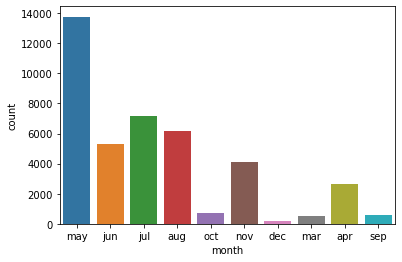

In [30]:
sns.countplot(x = 'month', data = df)

In [31]:
#Not Good predictor
pd.crosstab(df['month'], df['y'], margins = True)

y,no,yes,All
month,,,
apr,2093,539,2632
aug,5523,655,6178
dec,93,89,182
jul,6525,649,7174
jun,4759,559,5318
mar,270,276,546
may,12883,886,13769
nov,3685,416,4101
oct,403,315,718


In [32]:
df.drop('month', axis = 1, inplace = True)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

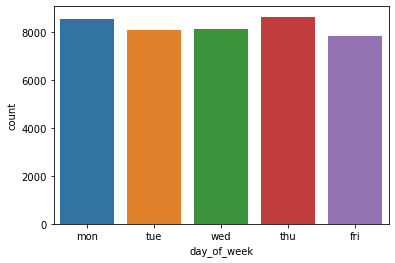

In [33]:
sns.countplot(x = 'day_of_week', data = df)

In [34]:
#No significance at all
pd.crosstab(df['day_of_week'], df['y'], margins = True)

y,no,yes,All
day_of_week,,,
fri,6981,846,7827
mon,7667,847,8514
thu,7578,1045,8623
tue,7137,953,8090
wed,7185,949,8134
All,36548,4640,41188


In [35]:
df.drop('day_of_week', axis = 1, inplace = True)

<AxesSubplot:xlabel='campaign', ylabel='Count'>

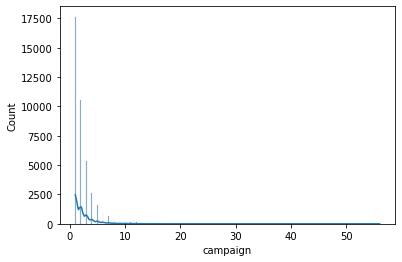

In [36]:
sns.histplot(x = 'campaign', data = df, kde = True)

<AxesSubplot:xlabel='y', ylabel='campaign'>

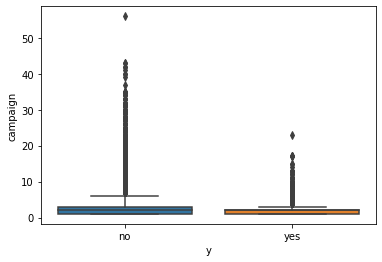

In [37]:
#Bad predictor
sns.boxplot(x = 'y', y = 'campaign', data = df)

In [38]:
df.drop('campaign', axis = 1, inplace = True)

In [39]:
df.corr()

,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
duration,1.000000,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
pdays,-0.047577,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.020640,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.027968,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.005312,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,-0.008173,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,-0.032897,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.044703,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:xlabel='pdays', ylabel='Count'>

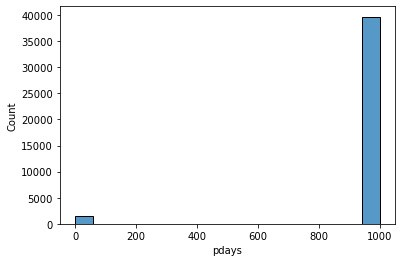

In [40]:
sns.histplot(x = 'pdays', data = df)

In [41]:
#Bad distribution
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [42]:
df.drop('pdays', axis = 1, inplace = True)

<AxesSubplot:xlabel='previous', ylabel='Count'>

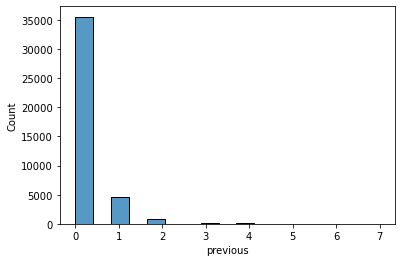

In [43]:
sns.histplot(x = 'previous', data = df)

In [44]:
#Bad distribution
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

<AxesSubplot:xlabel='y', ylabel='previous'>

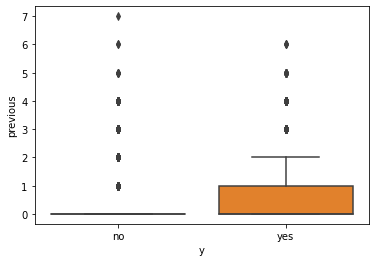

In [45]:
sns.boxplot(x = 'y', y = 'previous', data = df)

In [46]:
df.drop('previous', axis = 1, inplace = True)

In [47]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [48]:
#Not Great
pd.crosstab(df['poutcome'], df['y'], margins = True)

y,no,yes,All
poutcome,,,
failure,3647,605,4252
nonexistent,32422,3141,35563
success,479,894,1373
All,36548,4640,41188


In [49]:
df.drop('poutcome', axis = 1, inplace = True)

In [50]:
df.columns

Index(['contact', 'duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<AxesSubplot:xlabel='emp.var.rate', ylabel='Count'>

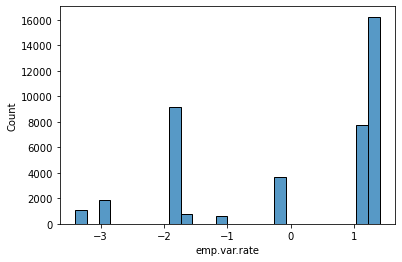

In [51]:
sns.histplot(x = 'emp.var.rate', data = df)

<AxesSubplot:xlabel='y', ylabel='emp.var.rate'>

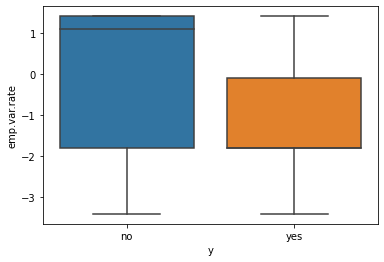

In [52]:
#all right predictor
sns.boxplot(x = 'y', y = 'emp.var.rate', data = df)

<AxesSubplot:xlabel='cons.price.idx', ylabel='Count'>

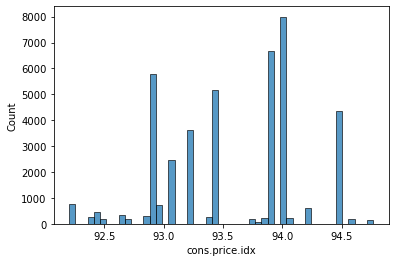

In [53]:
sns.histplot(x = 'cons.price.idx', data = df)

<AxesSubplot:xlabel='y', ylabel='cons.price.idx'>

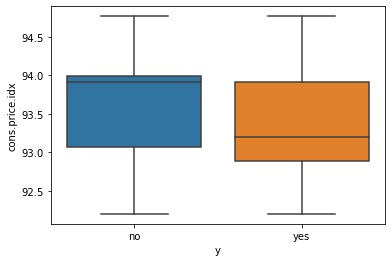

In [54]:
sns.boxplot(x = 'y', y = 'cons.price.idx', data = df)

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Count'>

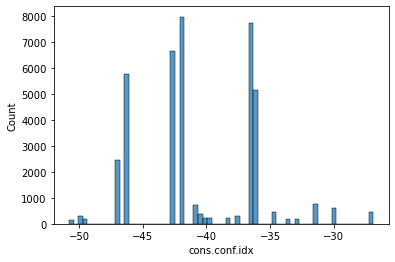

In [55]:
sns.histplot(x = 'cons.conf.idx', data = df)

<AxesSubplot:xlabel='y', ylabel='cons.conf.idx'>

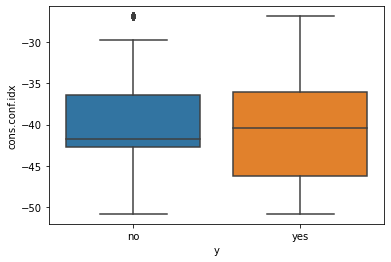

In [56]:
sns.boxplot(x = 'y', y = 'cons.conf.idx', data = df)

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

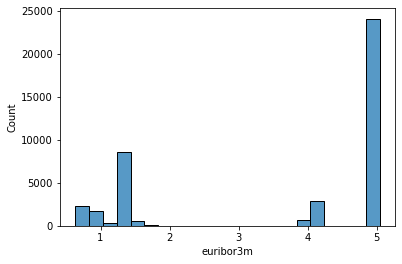

In [57]:
sns.histplot(x = 'euribor3m', data = df)

<AxesSubplot:xlabel='y', ylabel='euribor3m'>

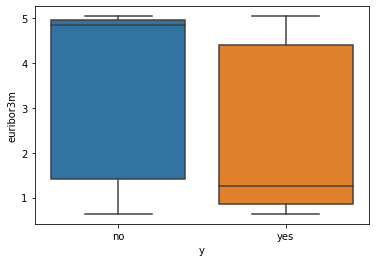

In [58]:
sns.boxplot(x = 'y', y = 'euribor3m', data = df)

<AxesSubplot:xlabel='nr.employed', ylabel='Count'>

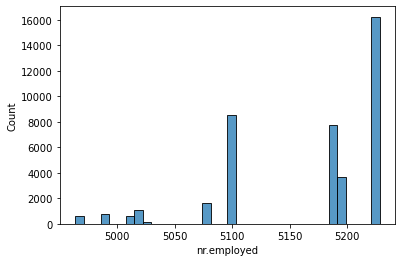

In [59]:
sns.histplot(x = 'nr.employed', data = df)

<AxesSubplot:xlabel='y', ylabel='nr.employed'>

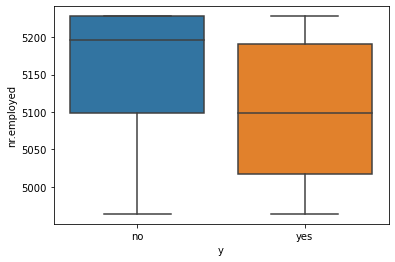

In [60]:
#Great Predictor
sns.boxplot(x = 'y', y = 'nr.employed', data = df)

In [61]:
df.columns

Index(['contact', 'duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<AxesSubplot:xlabel='duration', ylabel='Count'>

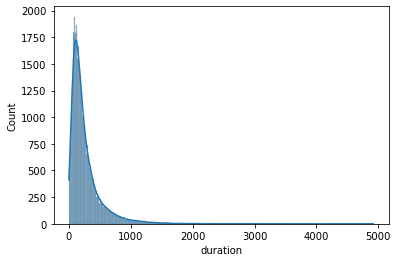

In [62]:
sns.histplot(x = 'duration', data = df, kde = True)

<AxesSubplot:xlabel='y', ylabel='duration'>

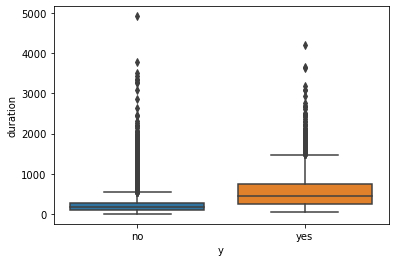

In [63]:
sns.boxplot(x = 'y', y = 'duration', data = df)

In [64]:
df[df['duration'] > df['duration'].mean() + df['duration'].std() * 2.75].count().max()

1040

In [65]:
df['duration'] = df['duration'].clip(upper = df['duration'].mean() + df['duration'].std() * 2.75)

<AxesSubplot:xlabel='y', ylabel='duration'>

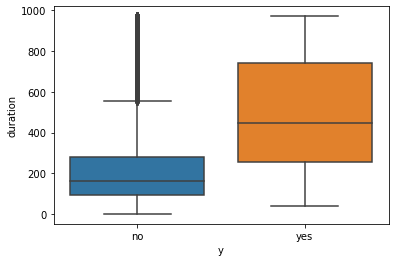

In [66]:
sns.boxplot(x = 'y', y = 'duration', data = df)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   contact         41188 non-null  object 
 1   duration        41188 non-null  float64
 2   emp.var.rate    41188 non-null  float64
 3   cons.price.idx  41188 non-null  float64
 4   cons.conf.idx   41188 non-null  float64
 5   euribor3m       41188 non-null  float64
 6   nr.employed     41188 non-null  float64
 7   y               41188 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.5+ MB


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['y'] = LabelEncoder().fit_transform(df['y'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   contact         41188 non-null  int32  
 1   duration        41188 non-null  float64
 2   emp.var.rate    41188 non-null  float64
 3   cons.price.idx  41188 non-null  float64
 4   cons.conf.idx   41188 non-null  float64
 5   euribor3m       41188 non-null  float64
 6   nr.employed     41188 non-null  float64
 7   y               41188 non-null  int32  
dtypes: float64(6), int32(2)
memory usage: 2.2 MB


In [71]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [90]:
from sklearn.svm import SVC


In [102]:
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [103]:
y_pred_svc = classifier.predict(X_test)  

In [104]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_svc)

array([[7294,    0],
       [ 944,    0]], dtype=int64)

In [105]:
print("R2Score =", metrics.r2_score(y_test, y_pred_svc))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_svc))
print("ROC AUC Score =", metrics.roc_auc_score(y_test, y_pred_svc))

R2Score = -0.12942144228132735
Accuracy = 0.8854090798737557
ROC AUC Score = 0.5


In [106]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7294
           1       0.00      0.00      0.00       944

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.89      0.83      8238



D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(X_train,y_train, 5)

In [107]:
classifier = SVC(C = 0.1, gamma = 0.001)
classifier.fit(X_train,y_train)

SVC(C=0.1, gamma=0.001)

In [108]:
y_pred_svc = classifier.predict(X_test)  

In [109]:
metrics.confusion_matrix(y_test, y_pred_svc)

array([[7083,  211],
       [ 537,  407]], dtype=int64)

In [110]:
print("R2Score =", metrics.r2_score(y_test, y_pred_svc))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_svc))
print("ROC AUC Score =", metrics.roc_auc_score(y_test, y_pred_svc))

R2Score = 0.10507707751437201
Accuracy = 0.9092012624423403
ROC AUC Score = 0.7011080909314831


In [111]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.66      0.43      0.52       944

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

